/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters for K-means: 10
Optimal number of clusters for Agglomerative Hierarchical clustering: 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


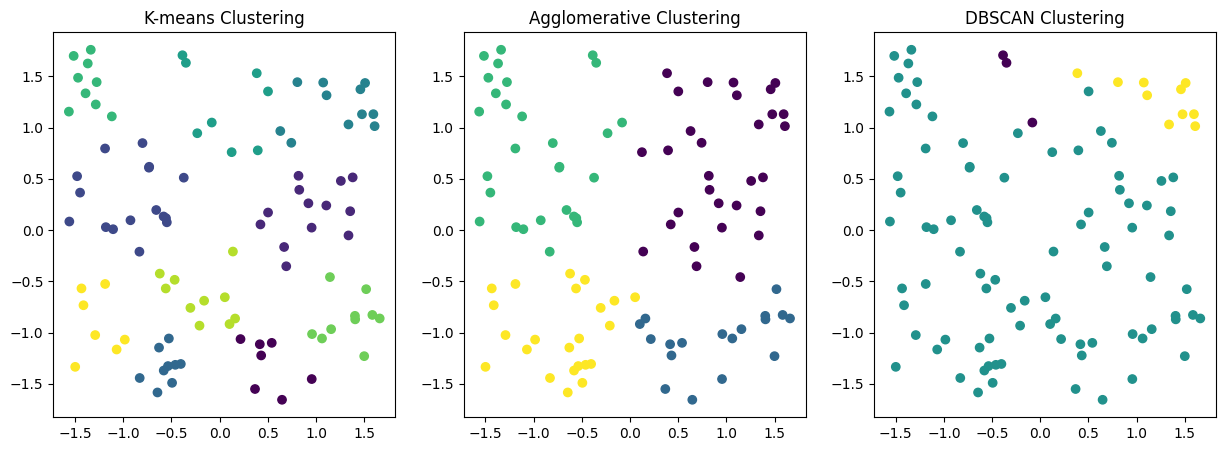

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your dataset or generate synthetic data for illustration
# Replace this with your actual dataset
# For example, assuming you have a dataframe named 'data'
# data = pd.read_csv('your_dataset.csv')

# Generate synthetic data for illustration purposes
np.random.seed(42)
data = np.random.rand(100, 2) * 10

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Function to find optimal number of clusters using K-means
def find_optimal_k(data, max_k=10):
    distortions = []
    for i in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

# Function to find optimal number of clusters using Agglomerative Hierarchical clustering
def find_optimal_clusters_agglomerative(data, max_clusters=10):
    scores = []
    for i in range(2, max_clusters + 1):
        agglomerative = AgglomerativeClustering(n_clusters=i)
        labels = agglomerative.fit_predict(data)
        score = silhouette_score(data, labels)
        scores.append(score)
    return scores

# Function to perform clustering using DBSCAN
def perform_dbscan(data, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    return labels

# Find optimal K for K-means
distortions = find_optimal_k(data_scaled)
optimal_k = distortions.index(min(distortions)) + 1
print(f"Optimal number of clusters for K-means: {optimal_k}")

# Find optimal number of clusters for Agglomerative Hierarchical clustering
silhouette_scores = find_optimal_clusters_agglomerative(data_scaled)
optimal_clusters_agglomerative = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters for Agglomerative Hierarchical clustering: {optimal_clusters_agglomerative}")

# Perform clustering using K-means with optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_labels = kmeans_optimal.fit_predict(data_scaled)

# Perform clustering using Agglomerative Hierarchical clustering with optimal number of clusters
agglomerative_optimal = AgglomerativeClustering(n_clusters=optimal_clusters_agglomerative)
agglomerative_labels = agglomerative_optimal.fit_predict(data_scaled)

# Perform clustering using DBSCAN
dbscan_labels = perform_dbscan(data_scaled, eps=0.5, min_samples=5)

# Visualize the results
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')

plt.subplot(132)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

plt.subplot(133)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()
